# Proyecto: Predicción de Precios BTC

<p>
Alumno: Martin Adrian Ferraguti <br>
Comisión: 60875 <br>
Curso: Data Science I: Fundamentos para la Ciencia de Datos <br>
</p>

### 1) Contexto comercial:
En un mercado financiero volátil y dinámico como el de las criptomonedas, la capacidad de prever el comportamiento del precio es esencial para tomar decisiones informadas y maximizar los rendimientos. En este contexto, se ha desarrollado un proyecto de Data Science centrado en la predicción del precio del activo Bitcoin (BTC) a corto plazo, específicamente a 24, 48, 72 y 96 horas.<br>

### 2) Objetivo del Análisis:
El objetivo principal de este proyecto es utilizar técnicas avanzadas de análisis de datos y aprendizaje automático para desarrollar modelos predictivos precisos que puedan anticipar con cierto grado de certeza la dirección y el movimiento del precio del BTC en las próximos 24, 48, 72 y 96 horas. Estos modelos serán fundamentales para informar las decisiones comerciales y estratégicas relacionadas con el activo BTC.

### 3) Problema comercial:
El presente proyecto de Data Science pretende: <br>
1- Mejorar de la toma de decisiones comerciales al contar con pronósticos precisos del precio del BTC a corto plazo.<br>
2- Colaborar en la optimización de las estrategias de trading y gestión de riesgos mediante la anticipación de tendencias y patrones en el mercado de criptomonedas.<br>
3- Aumentar la capacidad para aprovechar oportunidades de arbitraje y maximizar los rendimientos de las inversiones en BTC.<br>

### Comentario: Evento Halving
El halving de Bitcoin es un evento que ocurre cada 210.000 bloques, lo que equivale a aproximadamente cada 4 años.<br>
Durante el halving, la recompensa por minar un bloque de Bitcoin se reduce a la mitad.<br>
Este evento tiene un impacto importante en la oferta de Bitcoin, ya que reduce la cantidad de nuevos bitcoins que se crean cada año.<br>
Algunos analistas creen que el halving puede tener un impacto positivo en el precio de Bitcoin, ya que reduce la inflación y aumenta la escasez.<br>

Fechas de Halving:<br>
- Fechas pasadas:<br>
    - Primer evento halving: 28 de noviembre de 2012: La recompensa por bloque se redujo de 50 BTC a 25 BTC.<br>
    - Segundo evento halving: 9 de julio de 2016: La recompensa por bloque se redujo de 25 BTC a 12.5 BTC.<br>
    - Tercer evento halving: 11 de mayo de 2020: La recompensa por bloque se redujo de 12.5 BTC a 6.25 BTC.<br>
- Fechas futuras:<br>
    - Cuarto evento halving: Abril de 2024, la recompensa por bloque se reducirá de 6.25 BTC a 3.125 BTC.<br>
    - Quinto evento halving: Marzo de 2028, la recompensa por bloque se reducirá de 3.125 BTC a 1.5625 BTC.<br>
    - Sexto evento halving: Febrero de 2032, la recompensa por bloque se reducirá de 1.5625 BTC a 0.78125 BTC.<br>
Nota: La fecha exacta del halving puede variar ligeramente debido a la naturaleza dinámica del tiempo de bloque de Bitcoin.<br>

### 4) Contexto analítico:
Para llevar adelante este análisis contamos con un archivo csv con la siguiente estructura:<br>
- Columna A: Date -> Fecha.<br>
- Columna B: Open -> Cotización de apertura.<br>
- Columna C: High -> Valor más alto de cotización.<br>
- Columna D: Low -> Valor más bajo de cotización.<br>
- Columna E: Close -> Precio de cierre.<br>
- Columna F: Adj Close -> Precio de cierre ajustado.<br>
- Columna G: Volumne -> Volumen operado.<br>

### Comencemos
A continuación importamos las librerías que vamos a utilizar en este proyecto 🤓 .

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

from datetime import datetime

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\marti\AppData\Local\Temp\ipykernel_14540\2096710938.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Procedemos con el upload del dataframe 🥸 y seteamos su índice para que comience en 1.

In [2]:
file_name = 'BTC-USD.csv'
df = pd.read_csv(file_name)

df.set_index(pd.Index(range(1, len(df) + 1)), inplace=True)

### 5- Análisis exploratorio de datos (EDA)

🗒️ 5.1 - ¿Cuál es la cantidad de filas y columnas que componen mi dataframe?

In [3]:
filas, columnas = df.shape
print(f"Total de Filas = {filas}")
print(f"Total de Columnas = {columnas}")

Total de Filas = 3427
Total de Columnas = 7


🗒️ 5.2 - ¿Cuáles son las columnas o atributos que lo componen?

In [4]:
print(f"Este dataframe esta compuesto por las siguientes columnas:")
print(f"{df.columns}")

Este dataframe esta compuesto por las siguientes columnas:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


🗒️ 5.3 - ¿Cuáles son los tipos de dato de cada columna?

In [5]:
print(f"Tipo de Dato por Columna:")
df.dtypes

Tipo de Dato por Columna:


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

⚠️ Atención: La columna "Date" es de tipo object, deberemos convertirla a un formato de tipo date/datetime

🗒️ 5.4 - Veamos una pequeña muestra del dataframe, exploremos las primeras y últimas filas.

In [6]:
print("Esta es una muestra de los datos contenidos en el dataframe:")
print("PRIMEROS 5 REGISTROS")
print("====================")
df.head()

Esta es una muestra de los datos contenidos en el dataframe:
PRIMEROS 5 REGISTROS


,Date,Open,High,Low,Close,Adj Close,Volume
1,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
3,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
4,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
5,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [7]:
print("ÚLTIMOS 5 REGISTROS")
print("===================")
df.tail()

ÚLTIMOS 5 REGISTROS


,Date,Open,High,Low,Close,Adj Close,Volume
3423,2024-01-30,43300.226563,43838.945313,42711.371094,42952.609375,42952.609375,2.384281e+10
3424,2024-01-31,42946.250000,43717.406250,42298.945313,42582.605469,42582.605469,2.467363e+10
3425,2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,43075.773438,2.142395e+10
3426,2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,43185.859375,1.860384e+10
3427,2024-02-03,NaN,NaN,NaN,NaN,NaN,NaN


🗒️ 5.5 - Observamos datos estadísticos básicos de nuestro dataframe

In [8]:
print("Datos estadísticos básicos del DataFrame")
print("========================================")
df.describe()

Datos estadísticos básicos del DataFrame


,Open,High,Low,Close,Adj Close,Volume
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.426000e+03
mean,14844.983333,15190.603565,14472.970532,14856.142586,14856.142586,1.664234e+10
std,16345.789583,16735.443738,15909.755016,16348.222496,16348.222496,1.904475e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,923.028519,947.978745,917.340485,926.804230,926.804230,1.740438e+08
50%,8321.371093,8522.882812,8143.933594,8321.381348,8321.381348,1.188649e+10
75%,24999.604492,25877.554199,24509.110351,25106.704101,25106.704101,2.694028e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


🗒️ 5.6 - ¿Es necesario realizar transformaciones? <br>
        🗒️ 5.6.1 - ¿Es necesario cambiar el tipo de dato de alguna columna?: ⚠️ Rta: La columna date es de tipo object, vamos a transformarla a tipo date.

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 1 to 3427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3427 non-null   datetime64[ns]
 1   Open       3426 non-null   float64       
 2   High       3426 non-null   float64       
 3   Low        3426 non-null   float64       
 4   Close      3426 non-null   float64       
 5   Adj Close  3426 non-null   float64       
 6   Volume     3426 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


🗒️ 5.6.2 - ¿Hay valores nulos? utilizamos el método info() para saberlo. Si es así definimos una estrategia para solucionarlo.

In [10]:
print(f"La cantidad de registros presente en el dataframe es de {len(df)}")
print("")
df.info()

La cantidad de registros presente en el dataframe es de 3427

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 1 to 3427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3427 non-null   datetime64[ns]
 1   Open       3426 non-null   float64       
 2   High       3426 non-null   float64       
 3   Low        3426 non-null   float64       
 4   Close      3426 non-null   float64       
 5   Adj Close  3426 non-null   float64       
 6   Volume     3426 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


El uso del método len nos permite conocer la cantidad exacta de registros presentes en el DataFrame, en este caso, tenemos 3.427 filas. <br>
Mediante la aplicación del método .info() observamos que las columnas: 'Open', 'High', 'Low', 'Close', 'Adj Close' y 'Volume' contiene valores nulos, los cuales están presentes en la última fila de nuestro dataframe. <br>

En este caso la estrategia para la corrección de valores nulos consiste en eliminar la última fila del dataframe. <br>
La última fila solo es eliminada si efectivamente el último registro del dataframe contiene valores nulos. <br>

In [11]:
condicion = pd.isnull(df.iloc[-1]['Open']) or pd.isnull(df.iloc[-1]['High']) or pd.isnull(df.iloc[-1]['Low']) or pd.isnull(df.iloc[-1]['Close']) or pd.isnull(df.iloc[-1]['Adj Close']) or pd.isnull(df.iloc[-1]['Volume'])
if condicion == True:
    # Elimino la última fila del dataframe
    df.drop(df.index[-1], inplace=True)

print(f"La cantidad de registros presente en el dataframe es de {len(df)}")
print("")
df.info()

La cantidad de registros presente en el dataframe es de 3426

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 1 to 3426
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3426 non-null   datetime64[ns]
 1   Open       3426 non-null   float64       
 2   High       3426 non-null   float64       
 3   Low        3426 non-null   float64       
 4   Close      3426 non-null   float64       
 5   Adj Close  3426 non-null   float64       
 6   Volume     3426 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


🗒️ 5.7 - ¿Hay períodos faltantes? <br>
Para saber si hay valores faltantes vamos a analizar el atributo fecha, vamos a determinar su valor mínimo y máximo versus la cantidad de registros del dataframe.

In [12]:
fecha_min = df['Date'].min()
fecha_max = df['Date'].max()

dif_en_dias = ((fecha_max - fecha_min).days)+1

print(f"Los valores del dataframe estan contenidos entre el {fecha_min} y el {fecha_max} y la diferencia en días entre estas fechas es de {dif_en_dias}")
print(f"La cantidad de registros en el dataframe es de {len(df)}")

control = len(df) - dif_en_dias

if (control == 1):
    print("No hay valores faltantes en el rango de fechas")
else:
    print("Alerta: Hay valores faltantes/sobrantes en el rango de fechas")

Los valores del dataframe estan contenidos entre el 2014-09-17 00:00:00 y el 2024-02-02 00:00:00 y la diferencia en días entre estas fechas es de 3426
La cantidad de registros en el dataframe es de 3426
Alerta: Hay valores faltantes/sobrantes en el rango de fechas


🗒️ 5.8 - ¿Qué impacto tiene el evento halving en la cotización del activo?<br>
<br>
Graficamos un heatmap correspondiente al segundo evento halving

C:\Users\marti\AppData\Local\Temp\ipykernel_14540\3700001169.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Day'] = df_halving['Date'].dt.day
C:\Users\marti\AppData\Local\Temp\ipykernel_14540\3700001169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Month'] = df_halving['Date'].dt.month



El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: 2016-12-02 00:00:00 cuyo valor maximo fue de 777.94397
Dicho máximo ocurrió 146 días despues del evento halving



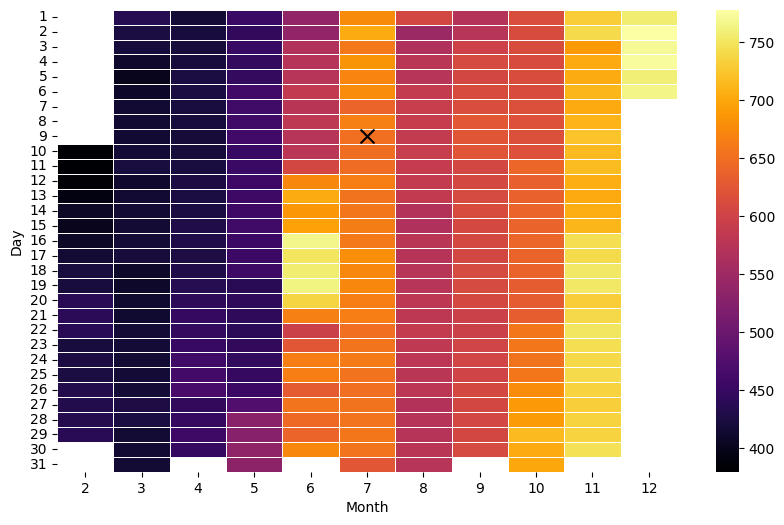

In [13]:
fch_hanving = datetime.strptime("2016-07-09", "%Y-%m-%d")
fch_halving_menos150 = datetime.strptime("2016-2-10", "%Y-%m-%d")
fch_halving_mas150 = datetime.strptime("2016-12-06", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas +/- 150 dias 
df_halving = df[
    (df['Date'] >= fch_halving_menos150)
    &
    (df['Date'] <= fch_halving_mas150)
]

# Creamos dos columnas adicionales, una para el dia y otra para el mes
df_halving['Day'] = df_halving['Date'].dt.day
df_halving['Month'] = df_halving['Date'].dt.month

# Creamos una tabla pivot para representar el heatmap
df_pivoted = df_halving.pivot(index='Day', columns='Month', values='Close')

# Defino el lienzo y creo un heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(df_pivoted, linewidths=0.5, cmap = 'inferno')

# Dibujo una X en el heatmap especificando la fecha del halving
plt.scatter(5.5, 8.5, marker='x', color='black', s=100)

id_pico_max_btc = df_halving['High'].idxmax()
fch_max_btc = df_halving.loc[id_pico_max_btc, 'Date']

print("")
print(f"El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: {fch_max_btc} cuyo valor maximo fue de {df_halving['Close'].max()}")
print(f"Dicho máximo ocurrió {(fch_max_btc - fch_hanving).days} días despues del evento halving")
print("")

🤓 Se observa que a medida que el evento halving se aproxima los valores de cierre de BTC comienzan a incrementarse alcanzando picos máximos de cotización cercanos a los 150 días posteriores al evento.

Graficamos un heatmap correspondiente al tercer evento halving

C:\Users\marti\AppData\Local\Temp\ipykernel_14540\3839543843.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Day'] = df_halving['Date'].dt.day
C:\Users\marti\AppData\Local\Temp\ipykernel_14540\3839543843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Month'] = df_halving['Date'].dt.month



El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: 2020-08-17 00:00:00 cuyo valor maximo fue de 12254.402344
Dicho máximo ocurrió 98 días despues del evento halving



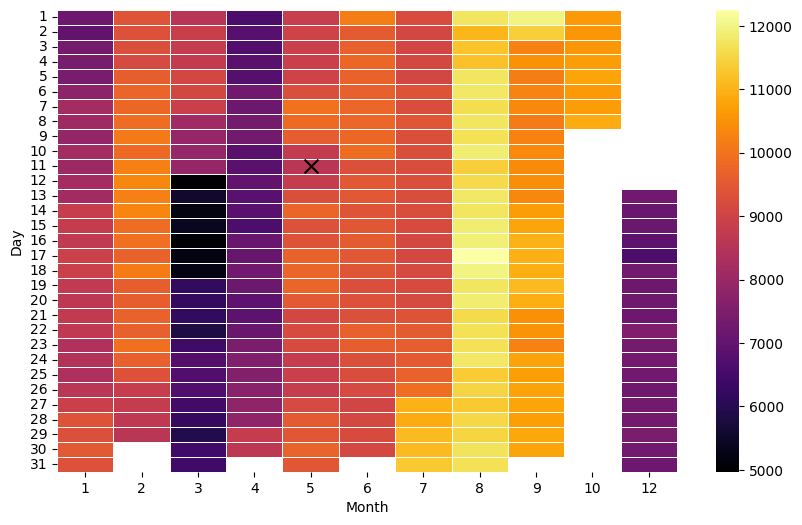

In [14]:
fch_hanving = datetime.strptime("2020-05-11", "%Y-%m-%d")
fch_halving_menos150 = datetime.strptime("2019-12-13", "%Y-%m-%d")
fch_halving_mas150 = datetime.strptime("2020-10-08", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas +/- 150 dias 
df_halving = df[
    (df['Date'] >= fch_halving_menos150)
    &
    (df['Date'] <= fch_halving_mas150)
]

# Creamos dos columnas adicionales, una para el dia y otra para el mes
df_halving['Day'] = df_halving['Date'].dt.day
df_halving['Month'] = df_halving['Date'].dt.month

# Creamos una tabla pivot para representar el heatmap
df_pivoted = df_halving.pivot(index='Day', columns='Month', values='Close')

# Defino el lienzo y creo un heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(df_pivoted, linewidths=0.5, cmap = 'inferno')

# Dibujo una X en el heatmap especificando la fecha del halving
plt.scatter(4.5, 10.5, marker='x', color='black', s=100)

id_pico_max_btc = df_halving['High'].idxmax()
fch_max_btc = df_halving.loc[id_pico_max_btc, 'Date']

print("")
print(f"El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: {fch_max_btc} cuyo valor maximo fue de {df_halving['Close'].max()}")
print(f"Dicho máximo ocurrió {(fch_max_btc - fch_hanving).days} días despues del evento halving")
print("")

🤓 Se observa que a medida que el evento halving se aproxima los valores de cierre de BTC comienzan a incrementarse alcanzando picos máximos de cotización cercanos a los 90 días posteriores al evento.

C:\Users\marti\AppData\Local\Temp\ipykernel_14540\872006494.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)
C:\Users\marti\AppData\Local\Temp\ipykernel_14540\872006494.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = df_mes['MesAño'], y=df_mes['Close'], data = df_mes, kind = 'box', palette = 'hls', height = 6, aspect = 3)


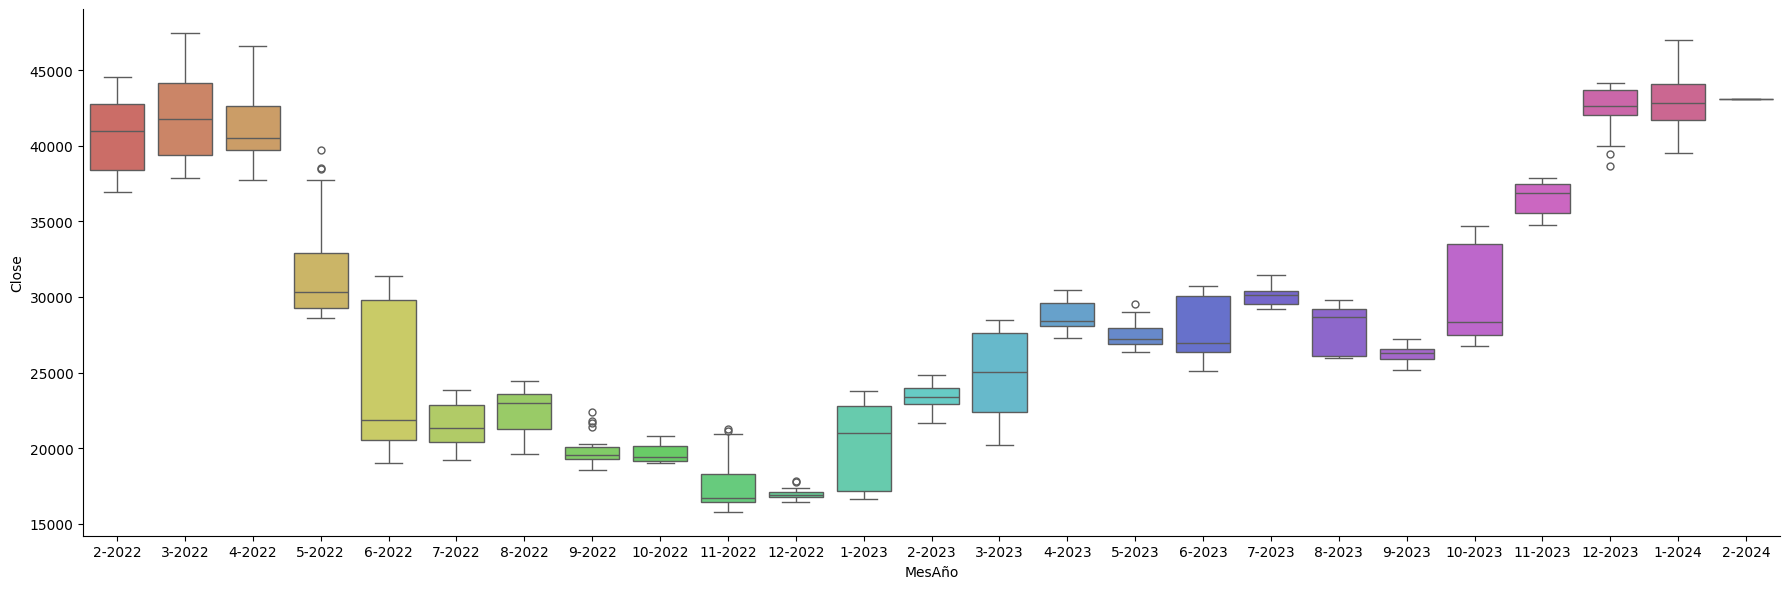

In [15]:
# Gráfica de Boxplt con el promedio de la cotizacion de cierre mes por mes de los últimos 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)

sb.catplot(x = df_mes['MesAño'], y=df_mes['Close'], data = df_mes, kind = 'box', palette = 'hls', height = 6, aspect = 3)

💰 Observamos que luego de 24 meses se volvieron a alcanzar máximos históricos.

C:\Users\marti\AppData\Local\Temp\ipykernel_14540\230241223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)


Text(0, 0.5, 'Cierre')

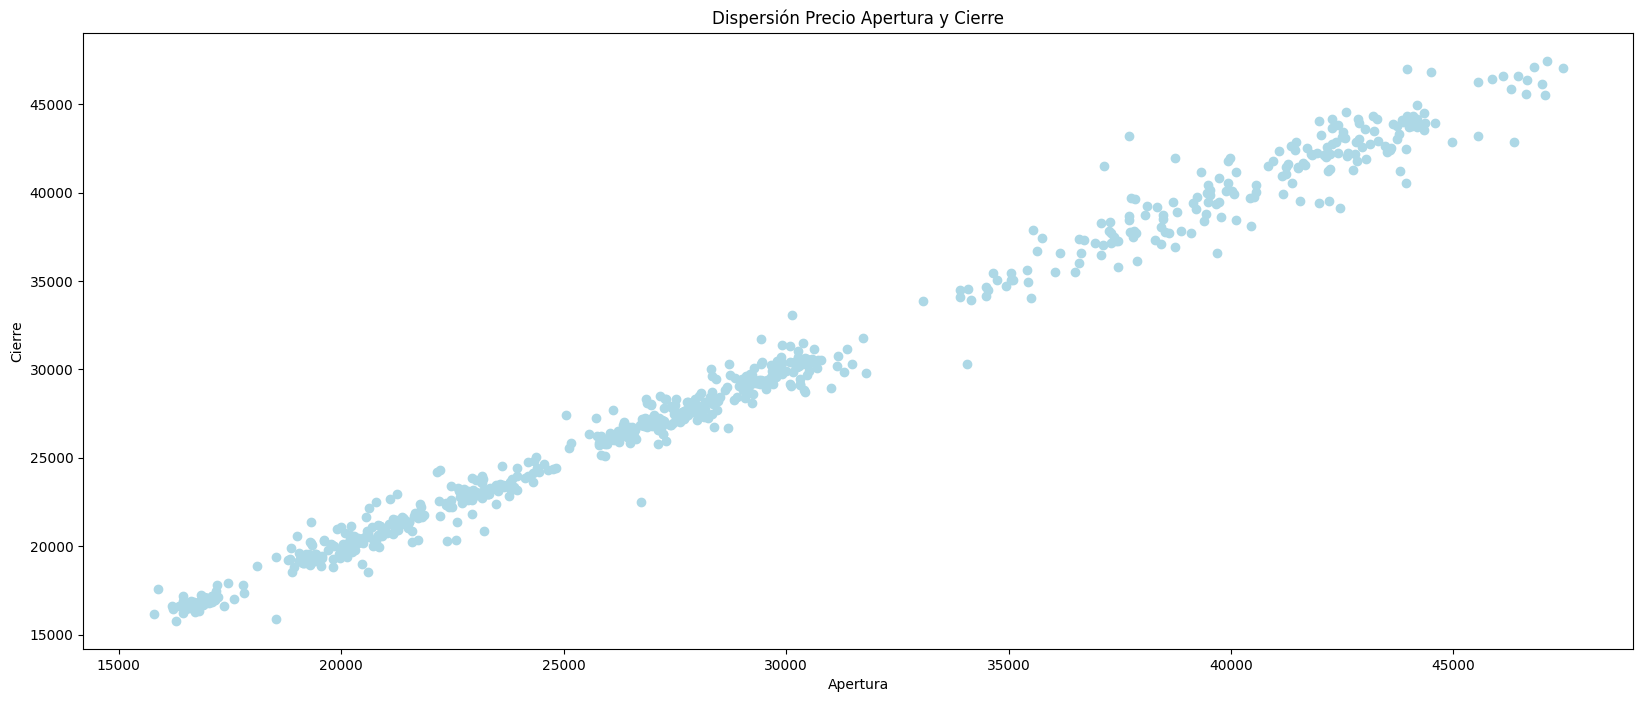

In [16]:
# Gráfica de dispersión con el promedio de la cotización de cierre mes por mes de los último 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)

plt.figure(figsize=(20, 8))
plt.scatter(x=df_mes["Open"], y=df_mes["Close"], color='lightblue')

plt.title("Dispersión Precio Apertura y Cierre")
plt.xlabel("Apertura")
plt.ylabel("Cierre")

💰 No se observan grandes dispersiones de valores.

### 2- Selección y entrenamiento del modelo

Se utilizará el modelo ARIMA el cual utiliza series temporales para analizar y predecir valores. Dicho modelo está compuesto por tres componentes principales: el modelo autorregresivo (AR), el modelo de media móvil (MA) y la diferenciación integrada (I).

Para ello primero definimos a la columna "Date" como índice del dataframe y procedemos a su ordenamiento.

In [17]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

Para observar que los cambios hayan impactado mostramos los 5 primeros registros.

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


Establecemos de forma explícita la frecuencia de los datos, asegurando que la misma sea diaria.<br>
Adicional se definen los siguientes órdenes del modelo:<br>
- El orden del componente AR (p) como 3, lo que significa que se utilizan los tres valores anteriores de la serie temporal para predecir el siguiente valor.<br>
- El orden de diferenciación (d) como 1, lo que indica que se aplica una diferencia de primer orden para hacer estacionaria la serie temporal.<br>
- El orden del componente MA (q) como 4, lo que significa que se utilizan los cuatro errores de predicción anteriores para modelar el error en la predicción actual.<br>

In [19]:
df = df.asfreq('D')
mod = ARIMA(df['Close'], order=(3,1,4))
res = mod.fit()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


A continuación se muestra un resumen del modelo ARIMA ajustado

In [20]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3426
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -27683.954
Date:                Thu, 28 Mar 2024   AIC                          55383.908
Time:                        20:01:17   BIC                          55433.019
Sample:                    09-17-2014   HQIC                         55401.455
                         - 02-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4023      0.053      7.532      0.000       0.298       0.507
ar.L2          0.4127      0.075      5.500      0.000       0.266       0.560
ar.L3         -0.9469      0.053    -17.907      0.0

Interpretación de los resultados:<br>
- Dep. Variable  (Variable Dependiente): Esta es la variable que hemos definido para ser utilizada en el modelo y de la cual queremos conocer su predicción.<br>
- No. Observations (Número de Observaciones): En este caso participaron un total de 3.426 observaciones las cuales fueron utilizadas para ajustar el modelo.<br>
- Model (Modelo): En este caso se utilizó un modelo ARIMA (3,1,4).<br>
- Log Likelihood (Verosimilitud Logarítmica): Esta es una medida de la calidad del ajuste del modelo. Valores más altos indican un mejor ajuste del modelo a los datos observados. En este caso el valor fue de -27683.954, lo cual no es bueno.<br>
- AIC (Akaike Information Criterion): Este es un criterio de información utilizado para comparar modelos, donde valores más bajos indican un mejor ajuste. En este caso el AIC es 55383.908.
- BIC (Bayesian Information Criterion): Similar al AIC, es otro criterio de información para comparar modelos, donde valores más bajos indican un mejor ajuste. En este caso, el BIC es 55433.019.
- Sample (Muestra): Indica el rango de fechas de la serie temporal que se utilizó para el ajuste del modelo, en este caso, desde el 17 de septiembre de 2014 hasta el 2 de febrero de 2024.<br>

A continuación generamos las predicciones y su intervalo de confianza.

In [21]:
pred = res.get_prediction(start=pd.to_datetime('2014-09-18'), end=pd.to_datetime('2024-02-07'), dynamic=False)
pred_ci = pred.conf_int()

Creamos un gráfico comparativo entre los datos observados y los datos simulados.

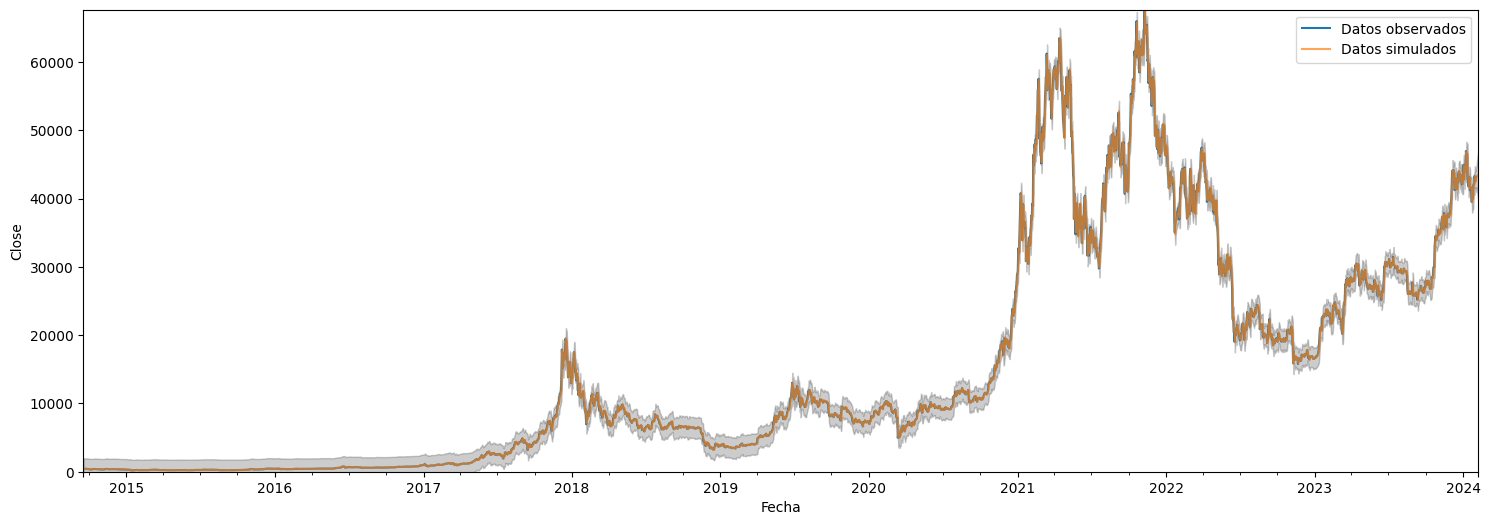

In [22]:
ax = df['Close']['2014':].plot(label='Datos observados')
pred.predicted_mean.plot(ax=ax, label='Datos simulados', alpha=.7, figsize=(18, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_ylim([0, df['Close'].max() + 100]) 
ax.set_xlabel('Fecha')
ax.set_ylabel('Close')
plt.legend()
plt.show()

Creamos un nuevo dataframe el cual almacena las predicciones generadas y por último guardamos dicha información en un archivo excel. 

In [23]:
df_pred = pd.DataFrame({'Defectos simulados': pred.predicted_mean})
df_pred.to_excel('datos_simulados.xlsx')

### 5- Conclusiones finales

A continuación realizamos una comparación entre los valores simulados y los reales donde se deducen las siguientes diferencias:<br>
Fecha	29-01-2024, cotización de cierre simulada	42.095,48, cotización de cierre real:	43.299,80, diferencia (real - simulado en USD):	1.204,32<br>
Fecha	30-01-2024, cotización de cierre simulada	43.211,95, cotización de cierre real:	42.946,20, diferencia (real - simulado en USD):	-265,75<br>
Fecha	31-01-2024, cotización de cierre simulada	42.876,81, cotización de cierre real:	42.580,50, diferencia (real - simulado en USD):	-296,31<br>
Fecha	01-02-2024, cotización de cierre simulada	42.505,18, cotización de cierre real:	43.081,40, diferencia (real - simulado en USD):	576,22<br>
Fecha	02-02-2024, cotización de cierre simulada	43.005,40, cotización de cierre real:	43.194,70, diferencia (real - simulado en USD):	189,30<br>
Fecha	03-02-2024, cotización de cierre simulada	43.211,19, cotización de cierre real:	43.005,70, diferencia (real - simulado en USD):	-205,49<br>
Fecha	04-02-2024, cotización de cierre simulada	43.298,01, cotización de cierre real:	42.581,40, diferencia (real - simulado en USD):	-716,61<br>
Fecha	05-02-2024, cotización de cierre simulada	43.393,43, cotización de cierre real:	42.697,20, diferencia (real - simulado en USD):	-696,23<br>
Fecha	06-02-2024, cotización de cierre simulada	43.436,86, cotización de cierre real:	43.087,70, diferencia (real - simulado en USD):	-349,16<br>
Fecha	07-02-2024, cotización de cierre simulada	43.411,50, cotización de cierre real:	44.339,80, diferencia (real - simulado en USD):	928,30<br>
<br>

A pesar de que los indicadores Log Likelihood, AIC y BIC no son buenos y es necesario realizar ajustes sobre el modelo ARIMA las diferencias resultantes entre los valores simulados y los valores reales no se consideran desproporcionados.